In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/forest-cover-type-dataset/covtype.csv


#### Inspiration: 
https://www.kaggle.com/roshanchoudhary/forest-cover-walkthrough-in-python-knn-96-51<br>
https://www.kaggle.com/sharmasanthosh/exploratory-study-on-feature-selection

## Data Dictionary

* Elevation = Elevation (altitude) in meters
* Aspect = Aspect in degrees azimuth
* Slope = Slope in degrees
* Horizontal_Distance_To_Hydrology = Horizontal distance to nearest surface water features
* Vertical_Distance_To_Hydrology = Vertical distance to nearest surface water features
* Horizontal_Distance_To_Roadways = Horizontal distance to nearest roadway
* Hillshade_9am = Hill shade index at 9am, summer solstice. Value out of 255
* Hillshade_Noon = Hill shade index at noon, summer solstice. Value out of 255
* Hillshade_3pm = Hill shade index at 3pm, summer solstice. Value out of 255
* Horizontal_Distance_To_Fire_Point = sHorizontal distance to nearest wildfire ignition points
* Wilderness_Area1 = Rawah Wilderness Area
* Wilderness_Area2 = Neota Wilderness Area
* Wilderness_Area3 = Comanche Peak Wilderness Area
* Wilderness_Area4 = Cache la Poudre Wilderness Area
* Soil types 1-40

### Tree species:
1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

### The problem:
Based on the given data, try to find some patterns in the feature space which influence the result. The result (label) is the forest cover itself, which refers to tree species. With the above features we have to try to find some algorithms that can help us predict the tree species based on environmental/climate parameters on a given plot.
### Real world application:
This prediction can be used for afforestation or reforestation decisions when it comes to finding the right species to plant.
### Approach
The data should be analyzed and statistically described. Then the useful features have to be selected.
This is a multi-class classification problem. We have 7 labels and we have to predict which one applies to given parameters.
To solve classification problems, we can use machine learning algorithms.

### Reading the csv files as a dataframe

In [2]:
df = pd.read_csv('../input/forest-cover-type-dataset/covtype.csv')

### Checking the dimension of the dataframe

In [3]:
print("There are {} records and {} features in the dataset".format(df.shape[0], df.shape[1]))

There are 581012 records and 55 features in the dataset


### Checking data types by column

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

### We can see that all columns contain only integers and there are only non-null values
### We can also visualize the missing values by column if any:

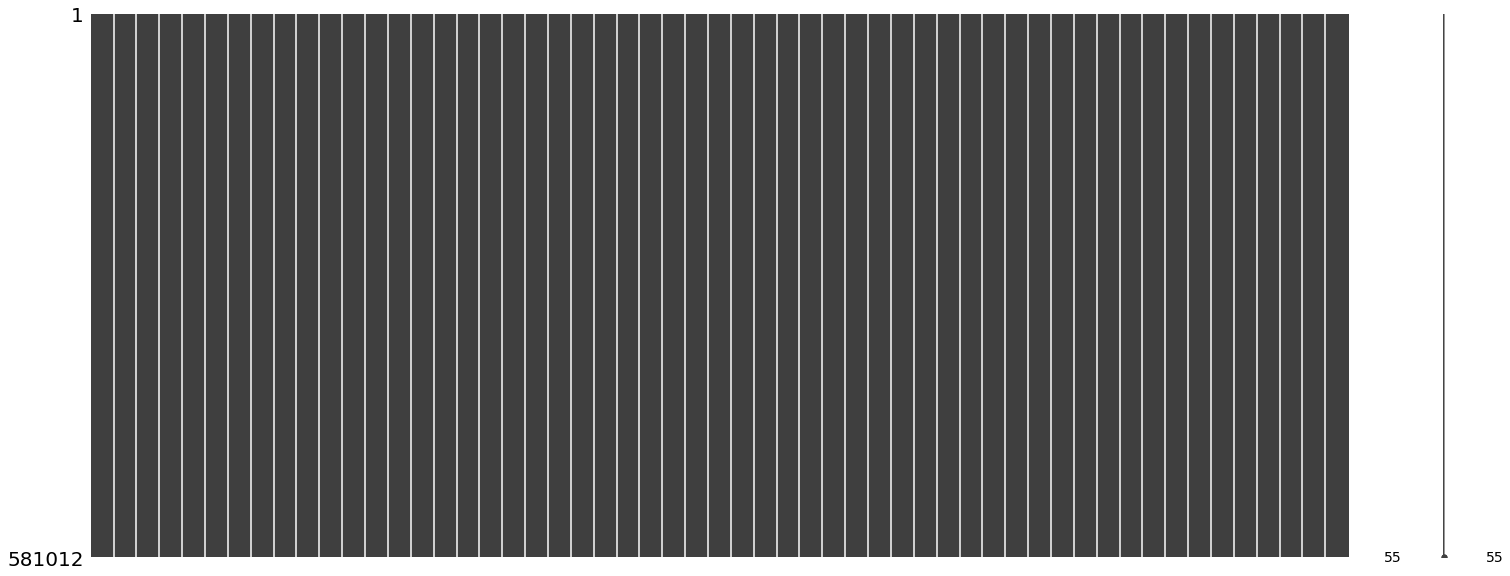

In [5]:
import missingno as msno
msno.matrix(df)

### We can see again, the dataset is very clear, no missing values

### We want to see all columns when seeing results, so we need to set this option (*Pandas only shows some columns from the beginning and from the end part of the dataframe by default*)

In [6]:
pd.set_option('display.max_columns', None)

### Displaying the first 5 rows of the dataframe just to have an overview

In [7]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


### Displaying the main statistical metrics for each column

In [8]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

### Some interesting facts:
* mean elevation is ~2959 m, minimum is 1859 m, maximum is 3858 m
* mean slope is 14°

### Take a look at the correlation between variables

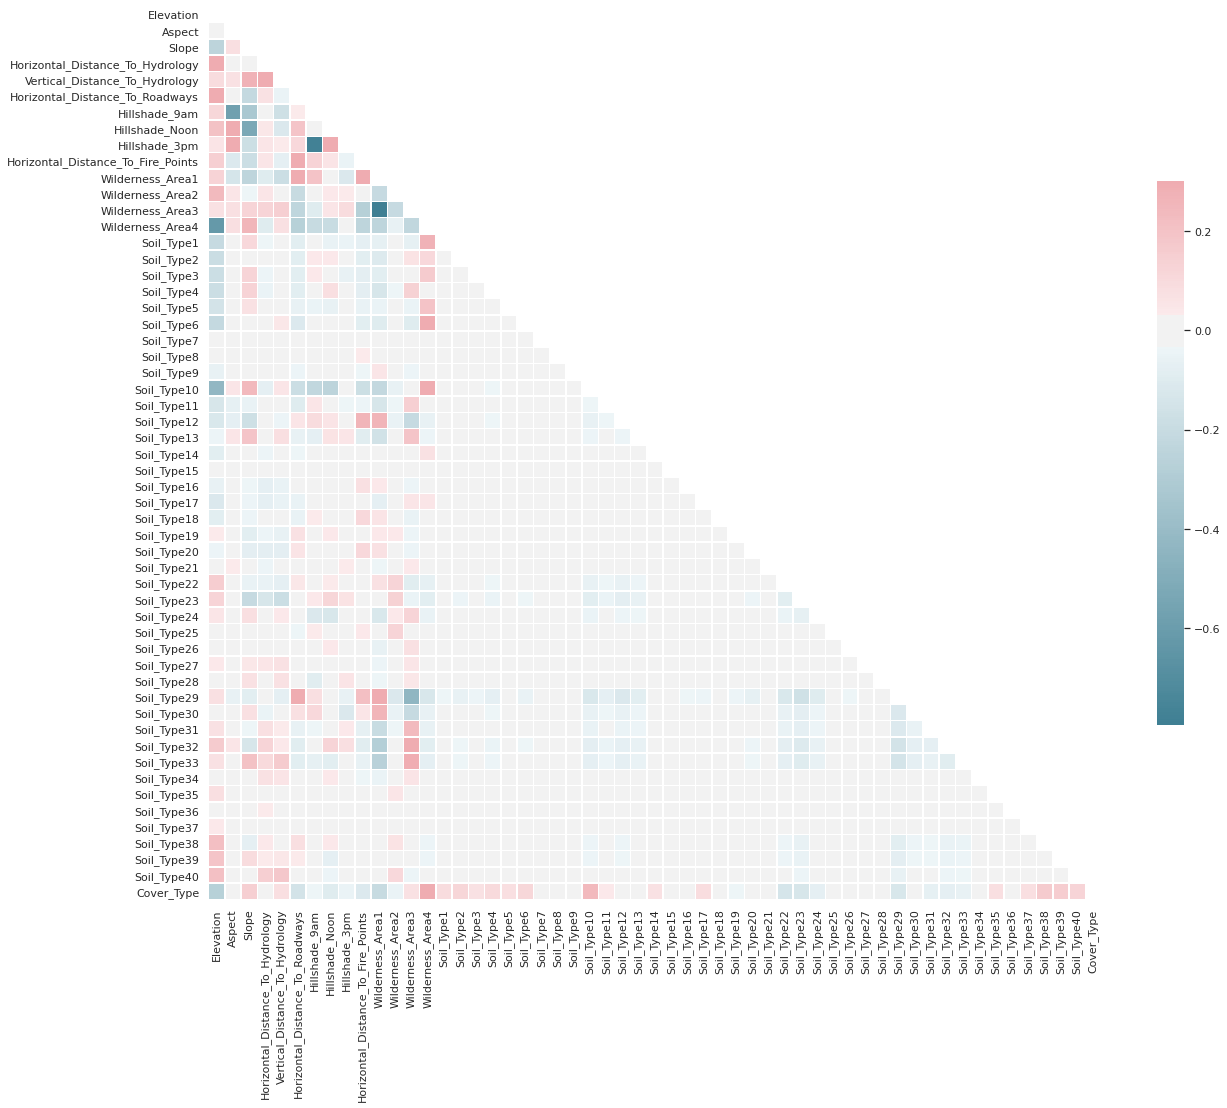

In [9]:
sb.set(style="white")
df_corr = df.corr()
mask_train = np.triu(np.ones_like(df_corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap_train = sb.diverging_palette(220, 10, as_cmap=True)
sb.heatmap(df_corr, mask=mask_train, cmap=cmap_train, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Check skewness

In [10]:
print(df.skew())

Elevation                              -0.817596
Aspect                                  0.402628
Slope                                   0.789273
Horizontal_Distance_To_Hydrology        1.140437
Vertical_Distance_To_Hydrology          1.790250
Horizontal_Distance_To_Roadways         0.713679
Hillshade_9am                          -1.181147
Hillshade_Noon                         -1.063056
Hillshade_3pm                          -0.277053
Horizontal_Distance_To_Fire_Points      1.288644
Wilderness_Area1                        0.205618
Wilderness_Area2                        4.061595
Wilderness_Area3                        0.257822
Wilderness_Area4                        3.575561
Soil_Type1                             13.736670
Soil_Type2                              8.615358
Soil_Type3                             10.838630
Soil_Type4                              6.625176
Soil_Type5                             18.995243
Soil_Type6                              9.240061
Soil_Type7          

In [11]:
df['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

### We'll look at skewness visually as well, but first we need to separate the continuous variables from the dataset

In [12]:
cont_df = df[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways',
              'Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']]

In [13]:
cont_df.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,2596,51,3,258,0,510,221,232,148,6279
1,2590,56,2,212,-6,390,220,235,151,6225
2,2804,139,9,268,65,3180,234,238,135,6121
3,2785,155,18,242,118,3090,238,238,122,6211
4,2595,45,2,153,-1,391,220,234,150,6172


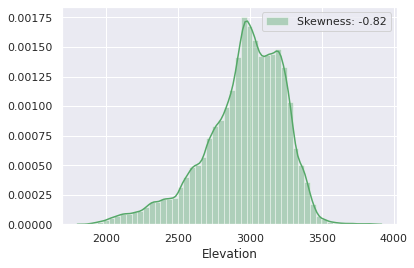

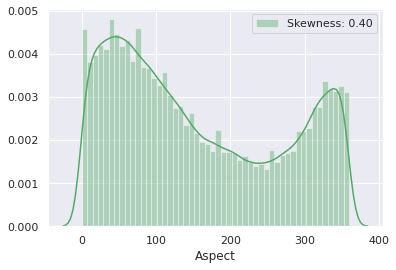

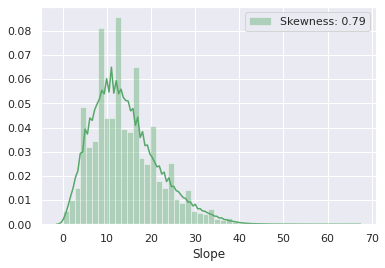

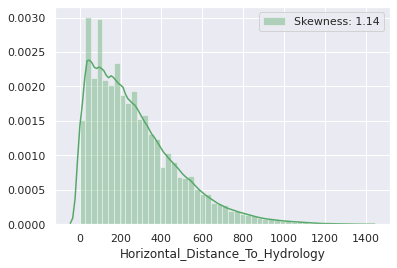

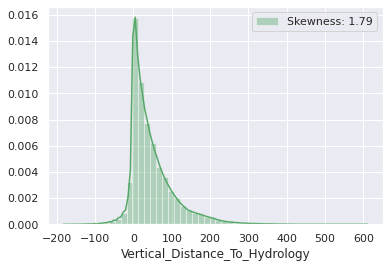

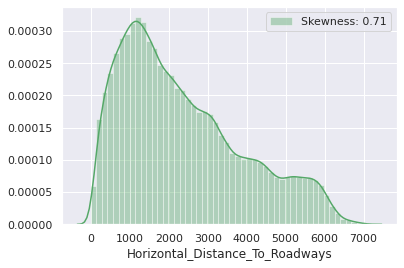

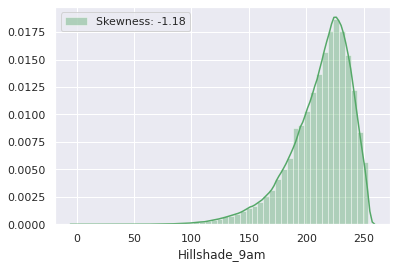

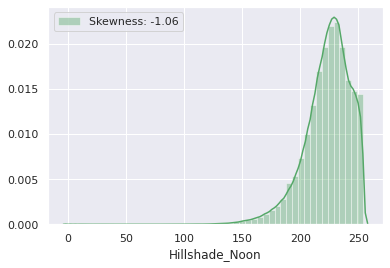

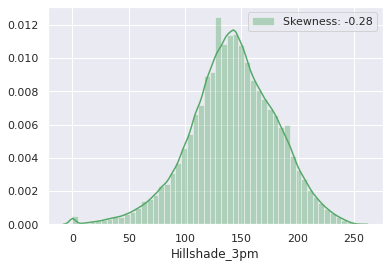

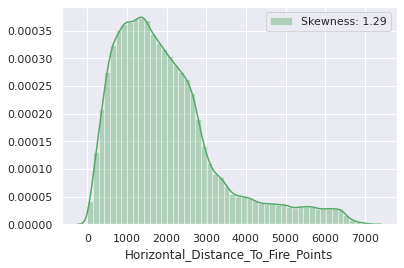

In [14]:
sb.set_style("darkgrid")
for i, col in enumerate(cont_df.columns):
    plt.figure(i)
    t = sb.distplot(cont_df[col],color="g",label="Skewness: {0:.2f}".format(cont_df[col].skew()))
    t.legend()

### On the next visuals we can see not just the quartiles and median but also the probability density of the data at different categories.

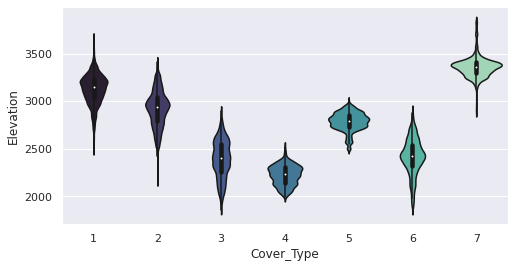

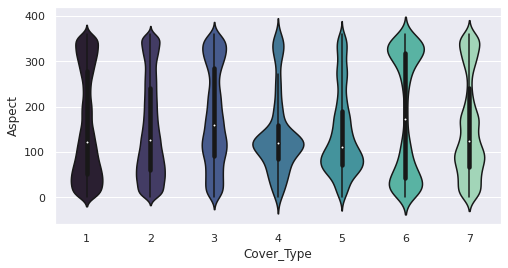

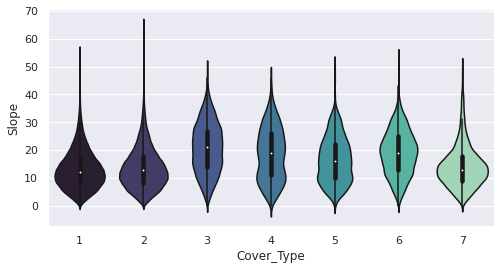

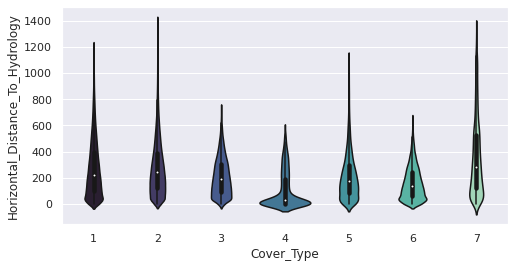

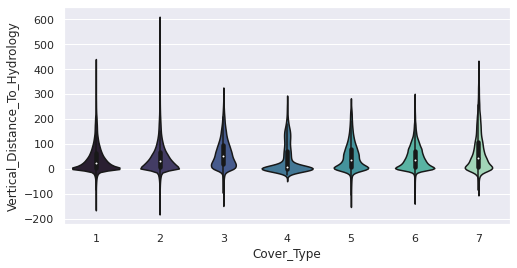

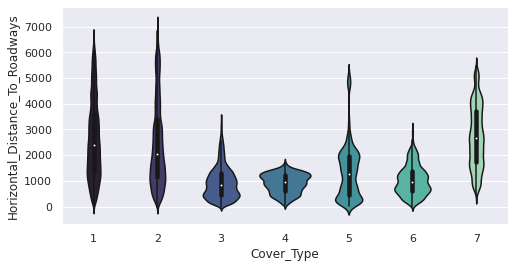

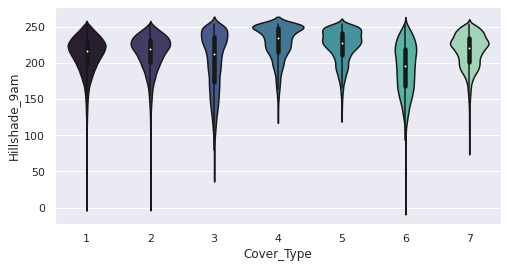

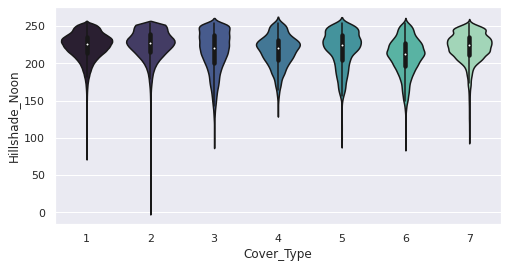

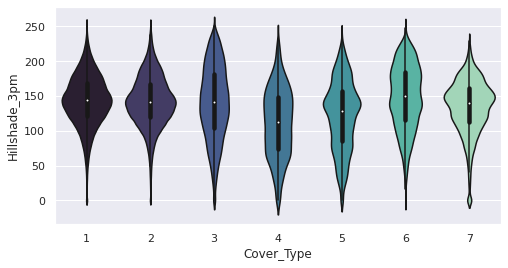

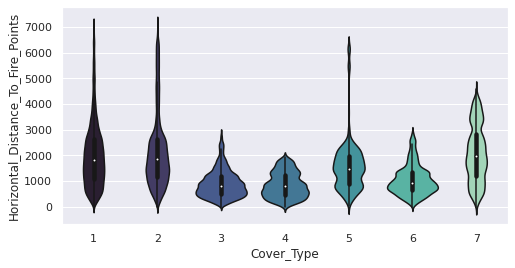

In [15]:
df['Cover_Type']=df['Cover_Type'].astype('category')

for i, col in enumerate(cont_df.columns):
    plt.figure(i,figsize=(8,4))
    sb.violinplot(x=df['Cover_Type'], y=col, data=df, palette="mako")

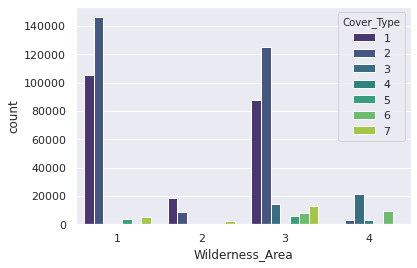

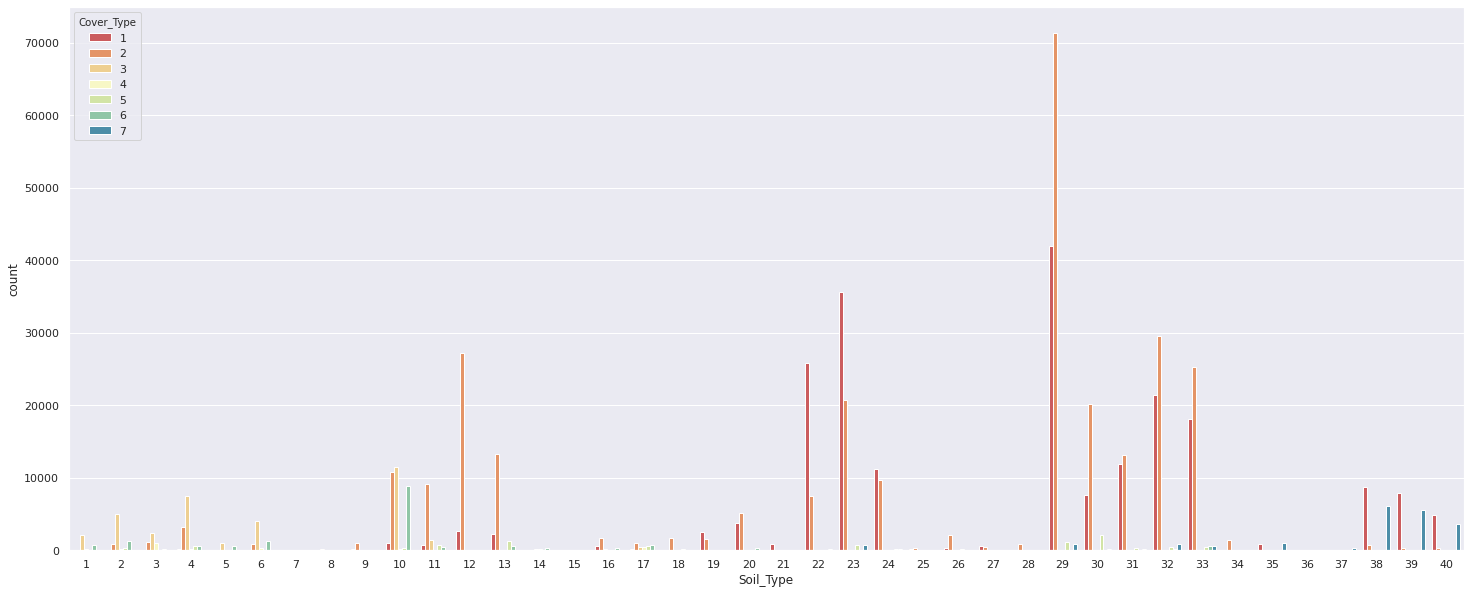

In [16]:
cols = df.columns

#number of rows=r, number of columns=c
r,c = df.shape

#Create a new dataframe with r rows, one column for each encoded category, and target
newdf = pd.DataFrame(index=np.arange(0, r),columns=['Wilderness_Area','Soil_Type','Cover_Type'])

#Make an entry in 'newdf' for each r as category_id, target value
for x in range(0,r):
    w=0;
    s=0;
    
    # Category1
    for y in range(10,14):
        if (df.iloc[x,y] == 1):
            w=y-9  #category class
            break
            
    # Category2       
    for z in range(14,54):
        if (df.iloc[x,z] == 1):
            s=z-13 #category class
            break
    #Make an entry in 'data' for each r as category_id, target value        
    newdf.iloc[x]=[w,s,df.iloc[x,c-1]]

#Category 1:
sb.countplot(x="Wilderness_Area", hue="Cover_Type", data=newdf, palette="viridis")
plt.show()

#Category 2:
plt.rc("figure", figsize=(25, 10))
sb.countplot(x="Soil_Type", hue="Cover_Type", data=newdf, palette="Spectral")
plt.show()

### Let's look at on the correlations between features again, now only with regards to continuous features

In [17]:
cont_df.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000


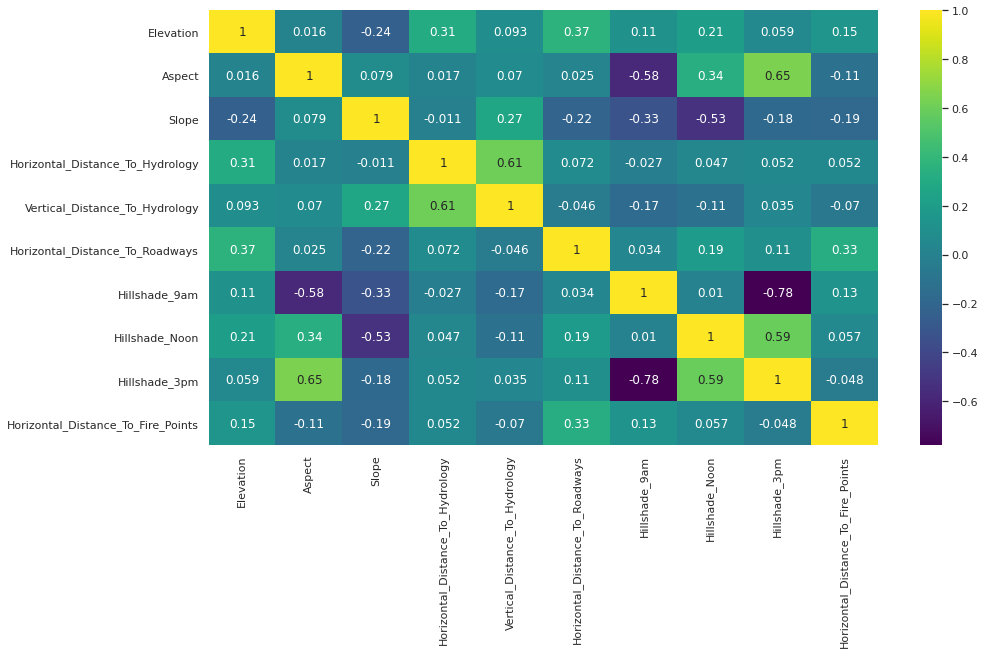

In [18]:
plt.figure(figsize=(15,8))
sb.heatmap(cont_df.corr(),cmap='viridis',annot=True)

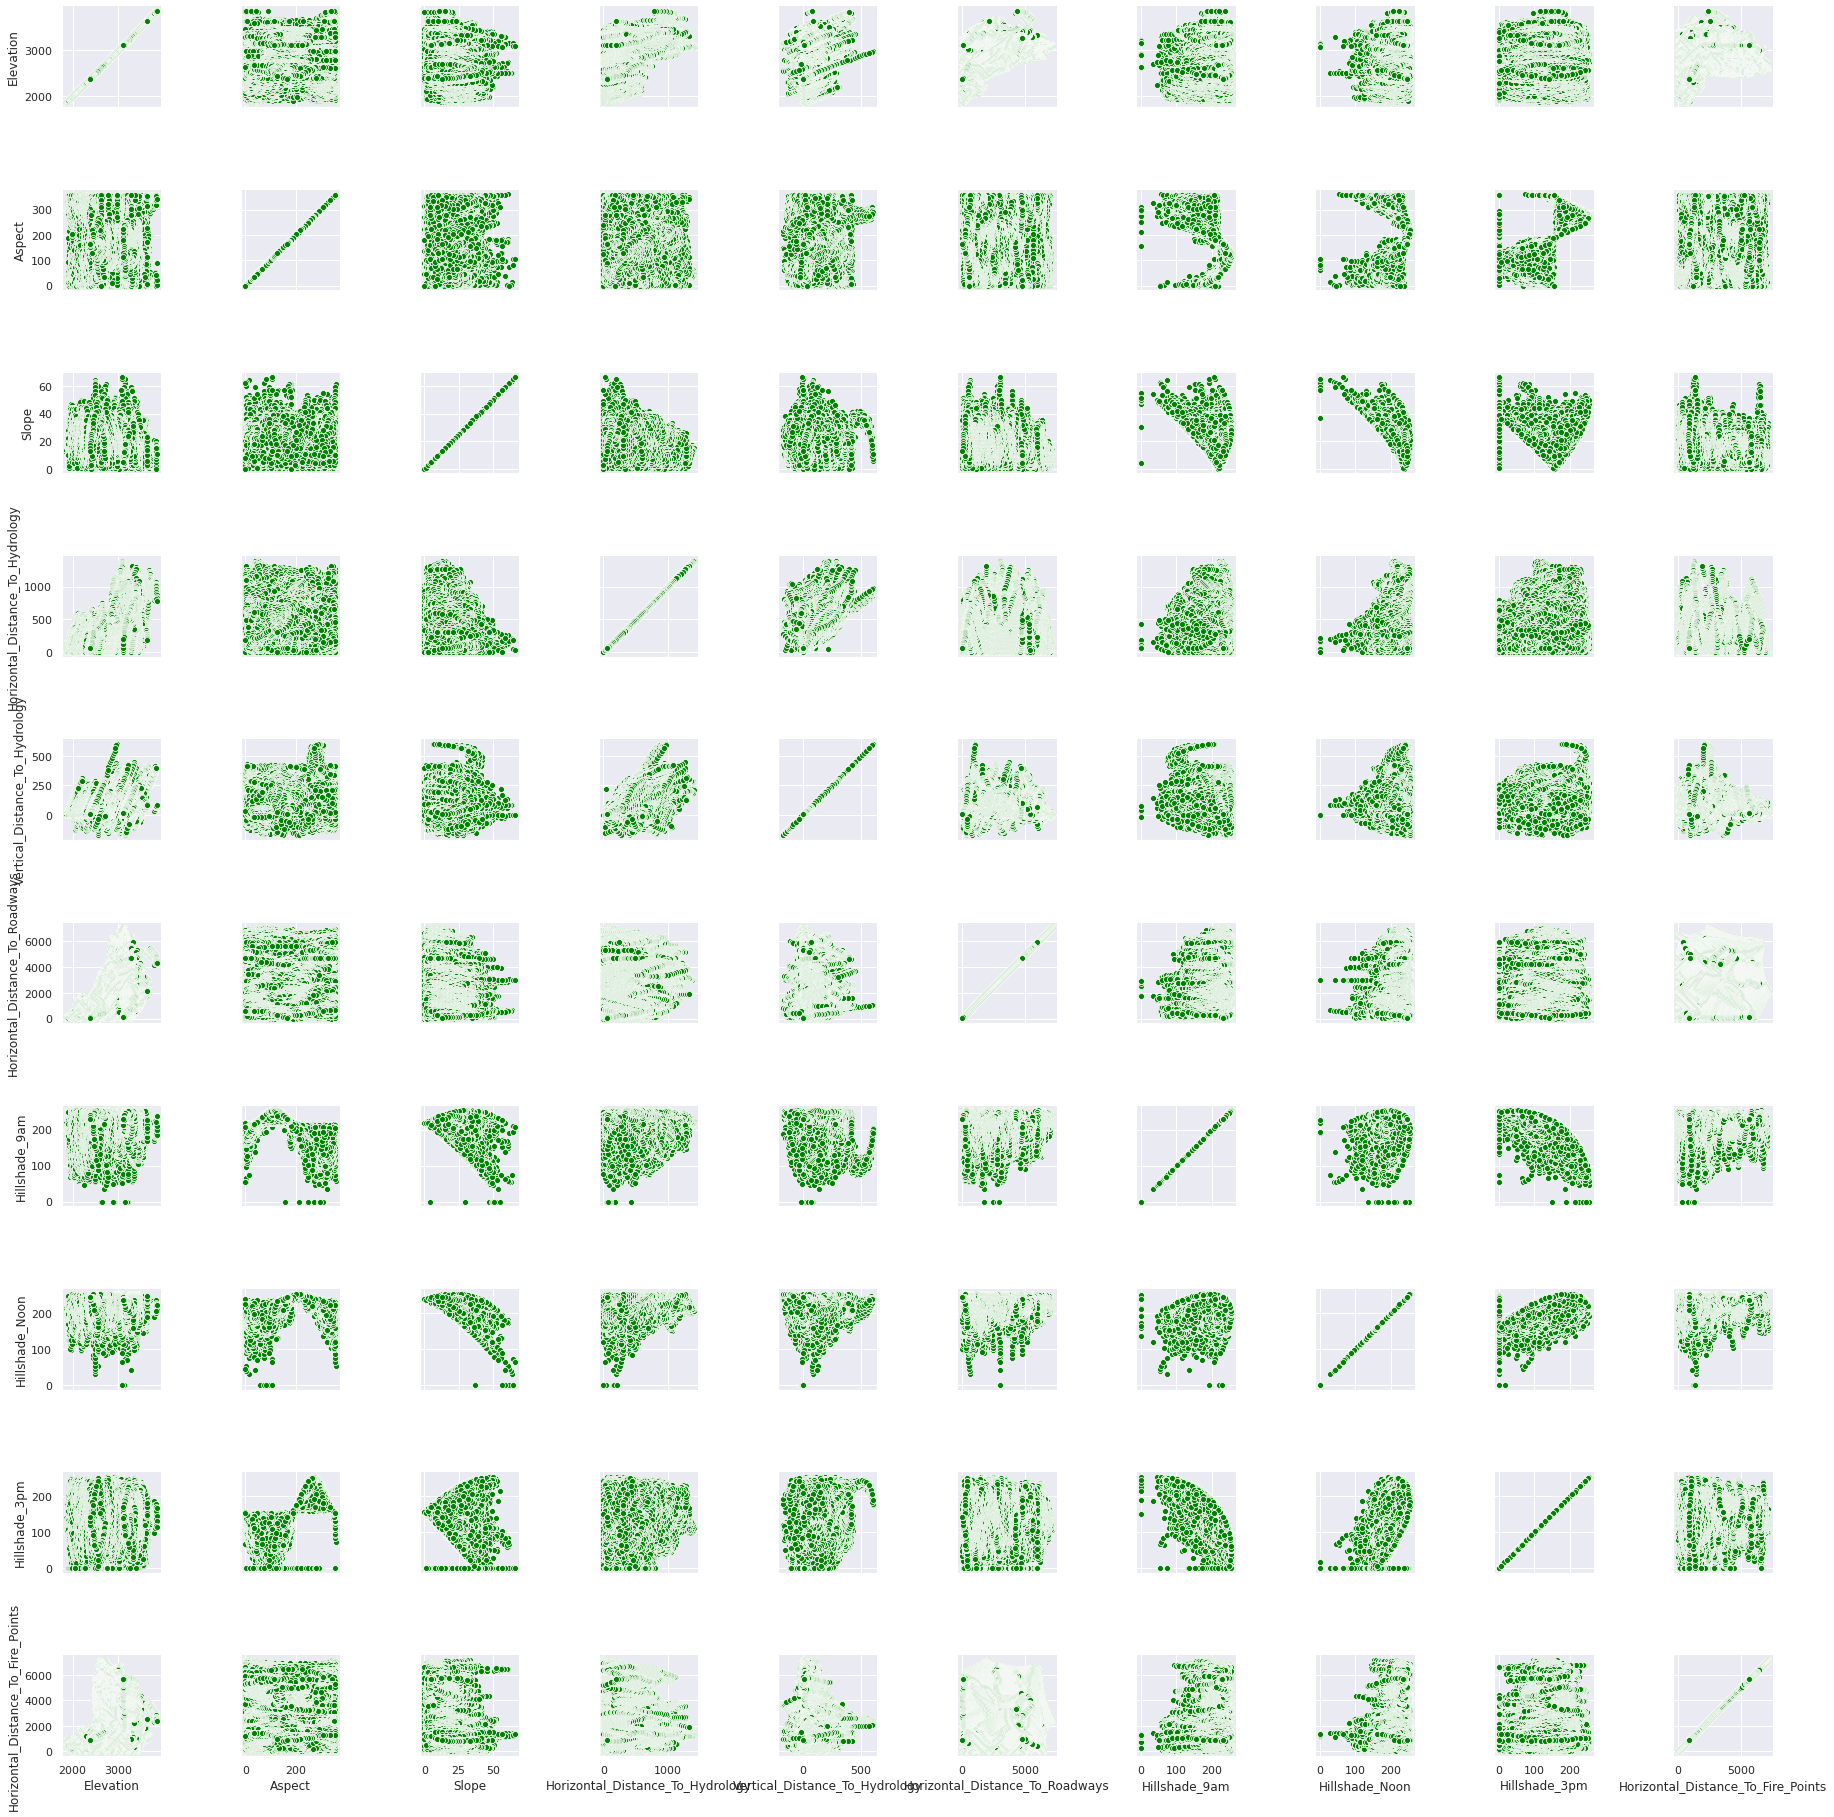

In [19]:
g = sb.PairGrid(cont_df)
g.map(sb.scatterplot, color="green")

### Let's divide the dataset to features and label

In [20]:
X=df.loc[:,'Elevation':'Soil_Type40']
y=df['Cover_Type']

### Let's remove the features with low variance

In [21]:
colstodrop=['Hillshade_3pm','Soil_Type7','Soil_Type8','Soil_Type14','Soil_Type15',
     'Soil_Type21','Soil_Type25','Soil_Type28','Soil_Type36','Soil_Type37']

In [22]:
X.drop(colstodrop, axis=1, inplace=True)

In [23]:
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type26,Soil_Type27,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [24]:
X.shape

(581012, 44)

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

### Split the data into train and test set

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.001, random_state=42)
X_train_reduced = X_train[:5000]
y_train_reduced = y_train[:5000]

### Making pipeline including scaling, grid search and cross validation for each model

pipe = make_pipeline(StandardScaler(), SVC())  
param_grid = {'svc__C': [1e3, 1e4, 1e5],
              'svc__gamma': [0.001, 0.01, 0.1]}
gs = GridSearchCV(pipe, param_grid, cv=5)
gs.fit(X_train[:2000], y_train[:2000])

gs.best_params_

gs.best_score_

In [27]:
clf_svc = make_pipeline(StandardScaler(),SVC(kernel='rbf',C=1000,gamma=0.001))

In [28]:
clf_svc.fit(X_train_reduced, y_train_reduced)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1000, gamma=0.001))])

In [29]:
y_pred = clf_svc.predict(X_test)

In [30]:
confusion_matrix(y_test, y_pred)

array([[151,  51,   0,   0,   0,   0,   1],
       [ 43, 231,   2,   0,   0,   2,   0],
       [  0,   3,  35,   2,   0,   5,   0],
       [  0,   0,   1,   0,   0,   0,   0],
       [  0,  12,   1,   0,   2,   0,   0],
       [  0,   4,   8,   2,   0,   8,   0],
       [  4,   0,   0,   0,   0,   0,  14]])

In [31]:
target_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine','Cottonwood/Willow','Aspen','Douglas-fir','Krummholz']
classification_report(y_test, y_pred, target_names=target_names)

'                   precision    recall  f1-score   support\n\n       Spruce/Fir       0.76      0.74      0.75       203\n   Lodgepole Pine       0.77      0.83      0.80       278\n   Ponderosa Pine       0.74      0.78      0.76        45\nCottonwood/Willow       0.00      0.00      0.00         1\n            Aspen       1.00      0.13      0.24        15\n      Douglas-fir       0.53      0.36      0.43        22\n        Krummholz       0.93      0.78      0.85        18\n\n         accuracy                           0.76       582\n        macro avg       0.68      0.52      0.55       582\n     weighted avg       0.76      0.76      0.75       582\n'

In [32]:
clf_svc.score(X_test,y_test)

0.7577319587628866

In [33]:
n = list(range(1,31))

In [34]:
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
param_grid = {'kneighborsclassifier__n_neighbors': n} 
gs = GridSearchCV(pipe, param_grid, cv=5) 
gs.fit(X_train[:20000], y_train[:20000])
gs.best_params_

{'kneighborsclassifier__n_neighbors': 1}

In [35]:
gs.best_score_

0.80145

In [36]:
clf_knn = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=5))
clf_knn.fit(X_train_reduced, y_train_reduced)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [37]:
y_pred = clf_knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[138,  61,   0,   0,   0,   0,   4],
       [ 55, 221,   2,   0,   0,   0,   0],
       [  0,   6,  33,   2,   0,   4,   0],
       [  0,   0,   1,   0,   0,   0,   0],
       [  2,  10,   1,   0,   2,   0,   0],
       [  0,   7,   9,   0,   0,   6,   0],
       [  6,   2,   0,   0,   0,   0,  10]])

In [38]:
classification_report(y_test, y_pred, target_names=target_names)

'                   precision    recall  f1-score   support\n\n       Spruce/Fir       0.69      0.68      0.68       203\n   Lodgepole Pine       0.72      0.79      0.76       278\n   Ponderosa Pine       0.72      0.73      0.73        45\nCottonwood/Willow       0.00      0.00      0.00         1\n            Aspen       1.00      0.13      0.24        15\n      Douglas-fir       0.60      0.27      0.37        22\n        Krummholz       0.71      0.56      0.63        18\n\n         accuracy                           0.70       582\n        macro avg       0.63      0.45      0.49       582\n     weighted avg       0.71      0.70      0.69       582\n'

In [39]:
clf_knn.score(X_test,y_test)

0.7044673539518901

In [40]:
clf_nb = make_pipeline(StandardScaler(), GaussianNB())
clf_nb.fit(X_train_reduced, y_train_reduced)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

In [41]:
y_pred = clf_knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[138,  61,   0,   0,   0,   0,   4],
       [ 55, 221,   2,   0,   0,   0,   0],
       [  0,   6,  33,   2,   0,   4,   0],
       [  0,   0,   1,   0,   0,   0,   0],
       [  2,  10,   1,   0,   2,   0,   0],
       [  0,   7,   9,   0,   0,   6,   0],
       [  6,   2,   0,   0,   0,   0,  10]])

In [42]:
classification_report(y_test, y_pred, target_names=target_names)

'                   precision    recall  f1-score   support\n\n       Spruce/Fir       0.69      0.68      0.68       203\n   Lodgepole Pine       0.72      0.79      0.76       278\n   Ponderosa Pine       0.72      0.73      0.73        45\nCottonwood/Willow       0.00      0.00      0.00         1\n            Aspen       1.00      0.13      0.24        15\n      Douglas-fir       0.60      0.27      0.37        22\n        Krummholz       0.71      0.56      0.63        18\n\n         accuracy                           0.70       582\n        macro avg       0.63      0.45      0.49       582\n     weighted avg       0.71      0.70      0.69       582\n'

In [43]:
clf_nb.score(X_test,y_test)

0.16666666666666666

In [44]:
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier())
param_grid = { 'decisiontreeclassifier__max_depth': list(range(3,16)), 'decisiontreeclassifier__max_leaf_nodes': list(range(2, 100)) } 
gs = GridSearchCV(pipe, param_grid, cv=5) 
gs.fit(X_train[:20000], y_train[:20000])
gs.best_params_

{'decisiontreeclassifier__max_depth': 10,
 'decisiontreeclassifier__max_leaf_nodes': 99}

In [45]:
gs.best_score_

0.7381500000000001

In [46]:
clf_tree = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=10,max_leaf_nodes=99))
clf_tree.fit(X_train_reduced, y_train_reduced)
y_pred = clf_knn.predict(X_test)

In [47]:
confusion_matrix(y_test, y_pred)

array([[138,  61,   0,   0,   0,   0,   4],
       [ 55, 221,   2,   0,   0,   0,   0],
       [  0,   6,  33,   2,   0,   4,   0],
       [  0,   0,   1,   0,   0,   0,   0],
       [  2,  10,   1,   0,   2,   0,   0],
       [  0,   7,   9,   0,   0,   6,   0],
       [  6,   2,   0,   0,   0,   0,  10]])

In [48]:
clf_tree.score(X_test,y_test)

0.7061855670103093

In [50]:
clf_rf = make_pipeline(StandardScaler(), RandomForestClassifier(max_depth=10))
clf_rf.fit(X_train[:100000], y_train[:100000])
y_pred = clf_rf.predict(X_test)
clf_rf.score(X_test, y_test)

0.7353951890034365

In [ ]:
scores = cross_val_score(clf_rf, X_train, y_train, cv=5)
scores